# Case 2 - Diabetic Retinopathy Analysis
Cognitive Systems for Health Technology Applications<br>
Viljami Koho<br>
23.2.2018<br>
[Helsinki Metropolia University of Applied Sciences](http://www.metropolia.fi/en)

## Objectives
The aim of this first exercise is to get familiar how to use convolutional neural networks to classify diabetic retinopathy images.

## Import libraries

In [55]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras import models

%matplotlib inline

## Building network

In [56]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [57]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Data preprocessing

In [58]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'dataset2\\train'
validation_dir = 'dataset2\\validation'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=15,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=15,
        class_mode='binary')

Found 1751 images belonging to 2 classes.
Found 748 images belonging to 2 classes.


In [59]:
# Testing testing testing
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (15, 150, 150, 3)
labels batch shape: (15,)


In [60]:
labels_batch

array([ 0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.], dtype=float32)

## Modeling

In [61]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch = 50,
      verbose = 1,
      epochs = 10,
      validation_data = validation_generator,
      validation_steps = 10)

Epoch 1/10
50/50 [==============================] - 561s 11s/step - loss: 0.5650 - acc: 0.7150 - val_loss: 0.5652 - val_acc: 0.7000
Epoch 2/10
50/50 [==============================] - 393s 8s/step - loss: 0.5185 - acc: 0.7200 - val_loss: 0.5893 - val_acc: 0.7067
Epoch 3/10
50/50 [==============================] - 481s 10s/step - loss: 0.5483 - acc: 0.7234 - val_loss: 0.5496 - val_acc: 0.7400
Epoch 4/10
50/50 [==============================] - 448s 9s/step - loss: 0.5018 - acc: 0.7400 - val_loss: 0.5466 - val_acc: 0.7467
Epoch 5/10
50/50 [==============================] - 403s 8s/step - loss: 0.5016 - acc: 0.7480 - val_loss: 0.5320 - val_acc: 0.7600
Epoch 6/10
50/50 [==============================] - 494s 10s/step - loss: 0.5048 - acc: 0.7440 - val_loss: 0.5481 - val_acc: 0.7267
Epoch 7/10
50/50 [==============================] - 519s 10s/step - loss: 0.4930 - acc: 0.7364 - val_loss: 0.5112 - val_acc: 0.7733
Epoch 8/10
50/50 [==============================] - 525s 11s/step - loss: 0.503

In [62]:
# First test with very few epoch and small batch sizes
model.save('case_2_run_1.h5')

## Results

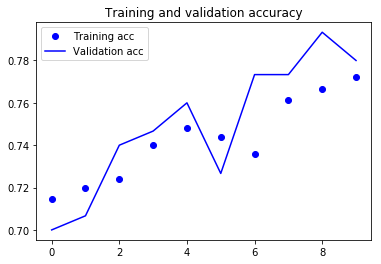

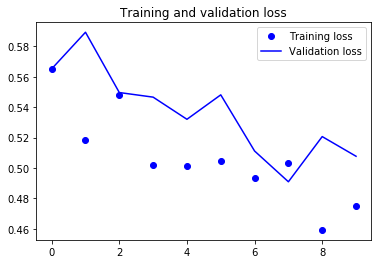

In [63]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()